In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lmod
from sklearn.metrics import r2_score

In [4]:
# Downloading the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
filename = "FuelConsumption.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")
else:
    print("Failed to download the file")

Downloaded FuelConsumption.csv


In [2]:
# Reading the dataset
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [3]:
# Summarizing The data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Selecting some Featues
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


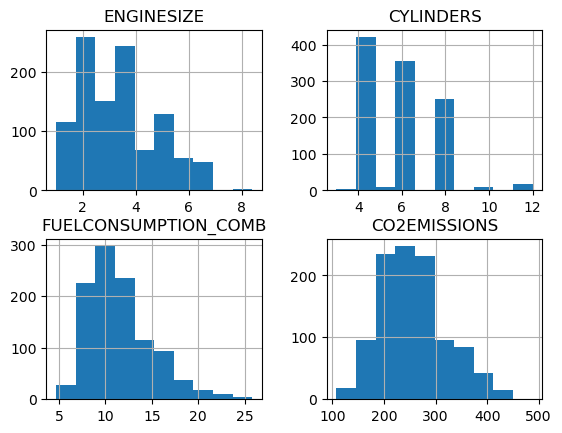

In [5]:
# Visualizing the data
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

### Finding Relationships using Visualization

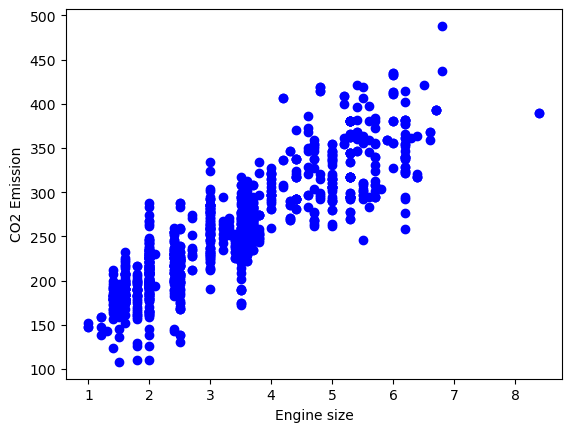

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

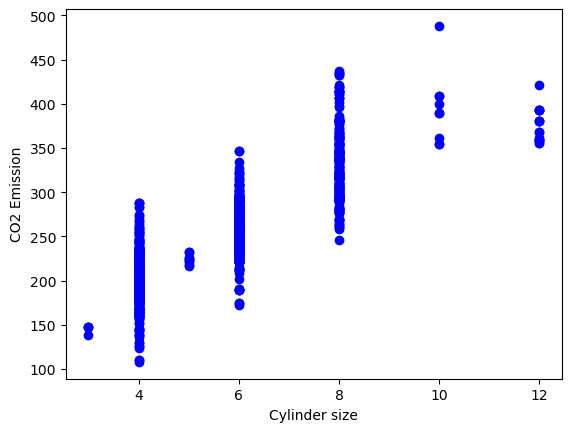

In [7]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("Cylinder size")
plt.ylabel("CO2 Emission")
plt.show()

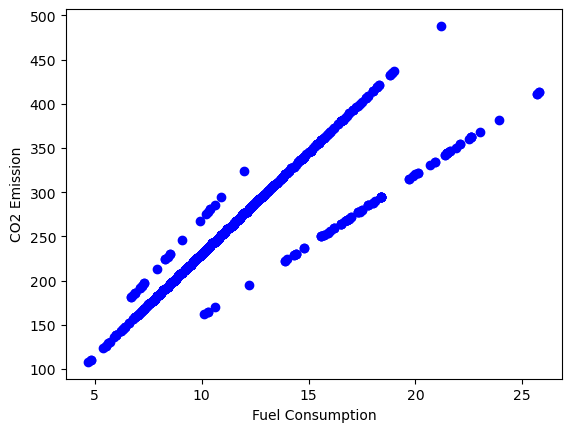

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show()

# Building a Model

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

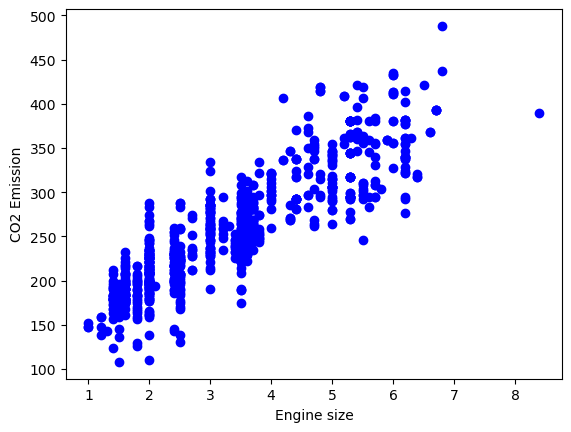

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

# Modeling the data

### 1. Training using 'ENGINESIZE' as a Feature

In [11]:
regr = lmod.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

LinearRegression()

In [12]:
# Printing the Coefficients
print('Coefficients: ',regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.45234461]]
Intercept:  [125.46142635]


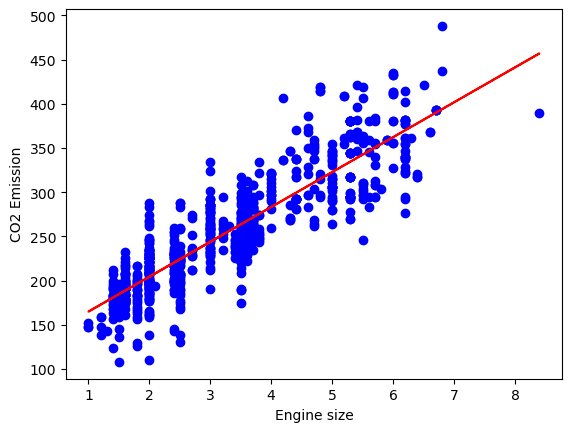

In [13]:
# Plotting the fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

In [14]:
# Evaluating the Data while using 'Engine size' as the Feature
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of Squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error: 23.96
Residual sum of Squares (MSE): 1020.24
R2-Score: 0.71


### 2. Training using 'FUELCONSUMPTION_COMB' as a Feature

In [15]:
train1_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

test1_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

# Not changing the 'Y' variable because the output is the same

In [16]:
regr.fit(train1_x, train_y)

LinearRegression()

In [17]:
predictions = regr.predict(test1_x)

In [18]:
# Printing the Coefficients
print('Coefficients: ',regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[16.09149325]]
Intercept:  [69.63562568]


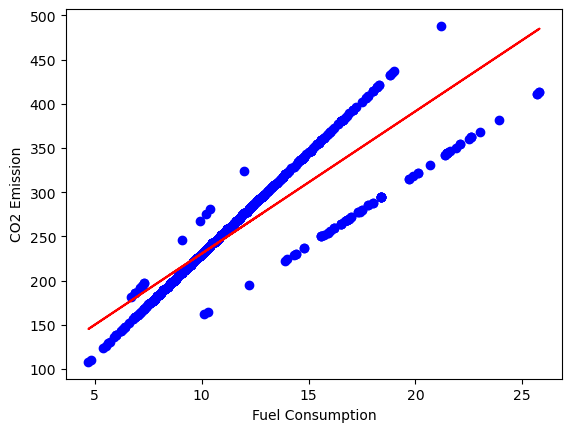

In [19]:
# Plotting the fit line over the data
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'blue')
plt.plot(train1_x, regr.coef_[0][0]*train1_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show()

In [20]:
# Evaluating the Data while using 'Fuel Consumption' as the feature
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual sum of Squares (MSE): %.2f" % np.mean((predictions - test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y, predictions))

Mean Absolute Error: 19.58
Residual sum of Squares (MSE): 721.45
R2-Score: 0.80


### 3. Training using 'CYLINDERS' as a Feature

In [21]:
train2_x = np.asanyarray(train[['CYLINDERS']])

test2_x = np.asanyarray(test[['CYLINDERS']])

In [22]:
regr.fit(train2_x, train_y)

LinearRegression()

In [23]:
predictions2 = regr.predict(test2_x)

In [24]:
# Printing the Coefficients
print('Coefficients: ',regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[30.09486507]]
Intercept:  [82.99005016]


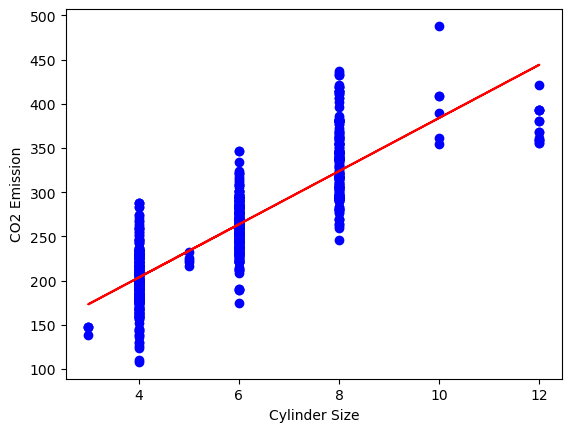

In [25]:
# Plotting the fit line over the data
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color = 'blue')
plt.plot(train2_x, regr.coef_[0][0]*train2_x + regr.intercept_[0], '-r')
plt.xlabel("Cylinder Size")
plt.ylabel("CO2 Emission")
plt.show()

In [26]:
# Evaluating the Data while using 'Cylinder size' as the feature
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions2 - test_y)))
print("Residual sum of Squares (MSE): %.2f" % np.mean((predictions2 - test_y)**2))
print("R2-Score: %.2f" % r2_score(test_y, predictions2))

Mean Absolute Error: 25.47
Residual sum of Squares (MSE): 1061.86
R2-Score: 0.70


# Insights 

1. The Model Performs best when taking 'Fuel Consumption' as the feature
        while having least 'Mean Absolute Error' and highest 'R2-Score'
2. The Model Performs worst when taking 'Cylinder size' as the feature
        while having highest 'Mean Absolute Error' and least 'R2-Score'